In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

import spikeinterface.core as si
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.postprocessing as spost
import spikeinterface.qualitymetrics as sqm
import spikeinterface.exporters as sexp
import spikeinterface.comparison as scmp
import spikeinterface.curation as scur
import spikeinterface.sortingcomponents as sc
import spikeinterface.widgets as sw
from probeinterface.plotting import plot_probe

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
si.set_global_job_kwargs(n_jobs=0.8)

In [3]:
recording = se.read_maxwell('explant.raw.h5')
print(recording)

MaxwellRecordingExtractor: 998 channels - 20.0kHz - 1 segments - 6,001,600 samples 
                           300.08s (5.00 minutes) - uint16 dtype - 11.16 GiB
  file_path: /Users/jonsoucy/Desktop/maxlab/explant.raw.h5


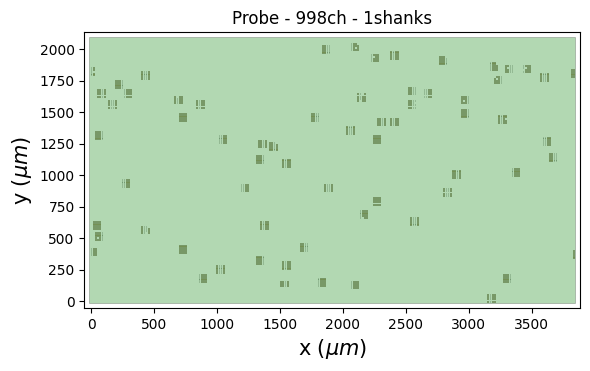

In [4]:
probe_full = recording.get_probe()

_ = plot_probe(probe_full)

In [5]:
#apply preprocessing to recording
recording_f = spre.bandpass_filter(recording, freq_min=300, freq_max=3000,dtype="float32")
recording_crm = spre.common_reference(recording_f, reference='global', operator='median')

#manually select the active channels in the recording
act_channels = [432, 372, 164, 168, 324, 124, 316, 132, 152, 156, 416, 356, 
                328, 276, 212, 256, 196, 484, 300, 200, 444, 172, 308, 268, 312, 428, 204, 
                288, 236, 116, 504, 16, 228, 264, 500, 216, 492, 284, 240, 140, 296, 280, 244]
act_channels = [str(a) for a in act_channels]

recording_act = recording_crm.channel_slice(act_channels)

#slice the recording length
fs = recording.sampling_frequency
recording_sub = recording_act.frame_slice(start_frame=int(fs * 60 * 0), end_frame=int(fs * 60 * 1))

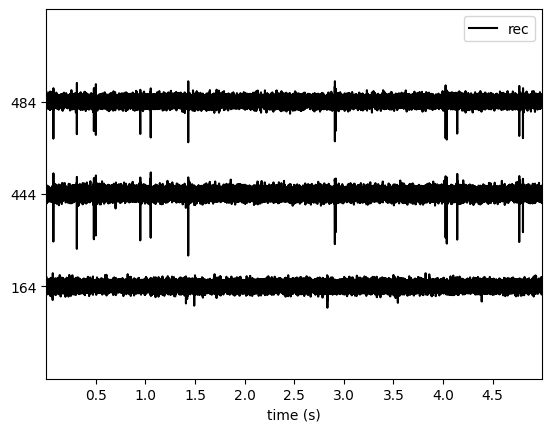

In [6]:
#validate a subset of the active channels
view_channels = [164,444,484]
view_channels = [str(a) for a in view_channels]

_ = sw.plot_traces(recording_act, time_range=(0, 5),mode="line", show_channel_ids=True, channel_ids=view_channels)

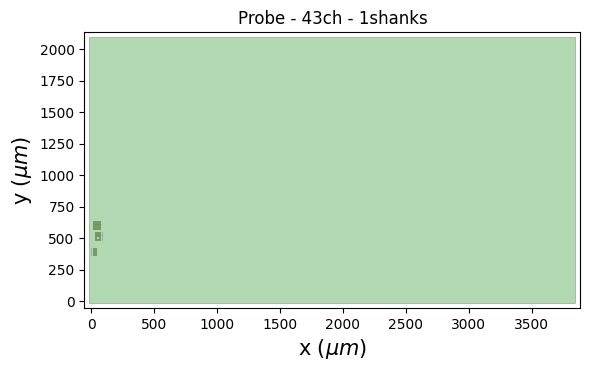

In [7]:
#validate active channel selection
probe_sub = recording_act.get_probe()

_ = plot_probe(probe_sub)

In [8]:
print("SpykingCircus2 params:")
pprint(ss.get_default_sorter_params('spykingcircus2'))

SpykingCircus2 params:
{'apply_preprocessing': True,
 'clustering': {},
 'detection': {'detect_threshold': 5, 'peak_sign': 'neg'},
 'filtering': {'dtype': 'float32', 'freq_min': 150},
 'general': {'ms_after': 2, 'ms_before': 2, 'radius_um': 100},
 'job_kwargs': {'n_jobs': -1},
 'localization': {},
 'matching': {},
 'selection': {'min_n_peaks': 20000, 'n_peaks_per_channel': 5000},
 'shared_memory': True,
 'waveforms': {'max_spikes_per_unit': 200,
               'method': 'ptp',
               'overwrite': True,
               'sparse': True,
               'threshold': 1}}


In [9]:
#define parameters for sorting
other_params2 = ss.get_default_sorter_params('spykingcircus2')
other_params2['detection']['detect_threshold'] = 5
other_params2['general']['radius_um'] = 250
print(other_params2)

{'general': {'ms_before': 2, 'ms_after': 2, 'radius_um': 250}, 'waveforms': {'max_spikes_per_unit': 200, 'overwrite': True, 'sparse': True, 'method': 'ptp', 'threshold': 1}, 'filtering': {'freq_min': 150, 'dtype': 'float32'}, 'detection': {'peak_sign': 'neg', 'detect_threshold': 5}, 'selection': {'n_peaks_per_channel': 5000, 'min_n_peaks': 20000}, 'localization': {}, 'clustering': {}, 'matching': {}, 'apply_preprocessing': True, 'shared_memory': True, 'job_kwargs': {'n_jobs': -1}}


In [10]:
#perform spike sorting using defined parameters
sorting = ss.run_sorter(sorter_name="spykingcircus2", remove_existing_folder=True,recording=recording_act, verbose=True, **other_params2)

print(sorting)

detect peaks using locally_exclusive with n_jobs = 12 and chunk_size = 20000


detect peaks using locally_exclusive:   0%|          | 0/301 [00:00<?, ?it/s]

We found 2678 peaks in total
We kept 2678 peaks for clustering
extracting features with n_jobs = 12 and chunk_size = 20000


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


extracting features:   0%|          | 0/301 [00:00<?, ?it/s]

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


We found 6 raw clusters, starting to clean with matching...
extract waveforms shared_memory multi buffer with n_jobs = 12 and chunk_size = 20000


extract waveforms shared_memory multi buffer:   0%|          | 0/301 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer with n_jobs = 12 and chunk_size = 20000


extract waveforms shared_memory multi buffer:   0%|          | 0/301 [00:00<?, ?it/s]

We kept 5 non-duplicated clusters...
extract waveforms shared_memory multi buffer with n_jobs = 12 and chunk_size = 20000


extract waveforms shared_memory multi buffer:   0%|          | 0/301 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer with n_jobs = 12 and chunk_size = 20000


extract waveforms shared_memory multi buffer:   0%|          | 0/301 [00:00<?, ?it/s]

find spikes (circus-omp-svd) with n_jobs = 12 and chunk_size = 2000


find spikes (circus-omp-svd):   0%|          | 0/3001 [00:00<?, ?it/s]

We found 2944 spikes
spykingcircus2 run time 511.54s
NumpyFolderSorting: 5 units - 1 segments - 20.0kHz


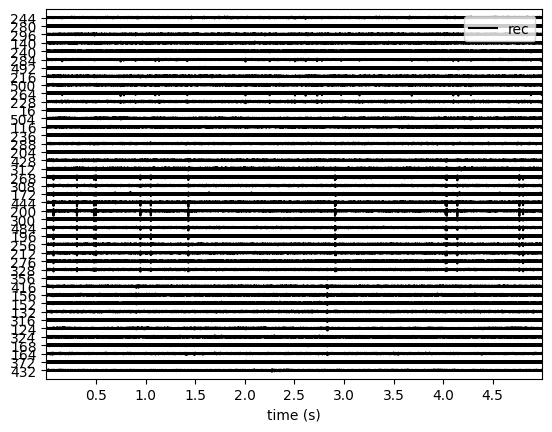

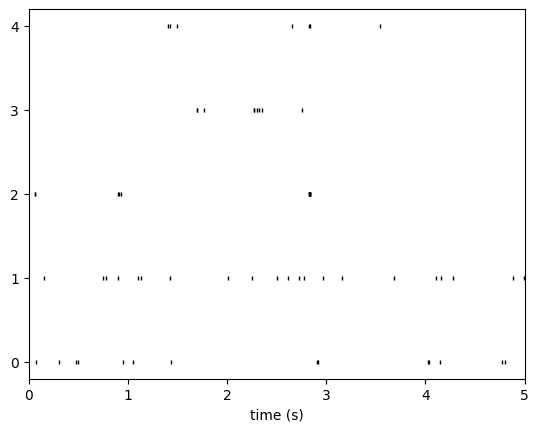

In [11]:
#validate spike sorting
_ = sw.plot_traces(recording_act, time_range=(0, 5),show_channel_ids=True, mode="line",)
_ = sw.plot_rasters(sorting, time_range=(0, 5))

In [12]:
#extract waveforms
we = si.extract_waveforms(recording_act, sorting, 'waveforms_folder', overwrite=True)
print(we)

extract waveforms shared_memory multi buffer:   0%|          | 0/301 [00:00<?, ?it/s]

extract waveforms memmap multi buffer:   0%|          | 0/301 [00:00<?, ?it/s]

WaveformExtractor: 43 channels - 5 units - 1 segments
  before:20 after:40 n_per_units:500 - sparse


In [13]:
# firing_rates = []
# for unit_id in sorting.get_unit_ids():
#     st = sorting.get_unit_spike_train(unit_id=unit_id, segment_index=0)
#     firing_rates.append(st.size / 60)
# sorting.set_property('firing_rate', firing_rates)

# print(sorting.get_property('firing_rate'))

In [19]:
amplitudes = spost.compute_spike_amplitudes(we)
unit_locations = spost.compute_unit_locations(we)
spike_locations = spost.compute_spike_locations(we)
correlograms, bins = spost.compute_correlograms(we)
similarity = spost.compute_template_similarity(we)
qms = sqm.compute_quality_metrics(we)

extract amplitudes:   0%|          | 0/301 [00:00<?, ?it/s]

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested

localize peaks using center_of_mass:   0%|          | 0/301 [00:00<?, ?it/s]

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/jonsoucy/anaconda3/envs/spike/lib/python3.11/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:842: UserWarning: Units [0, 2] have too few spikes and amplitude_cutoff is set to NaN
  warnings.warn(f"Units {nan_units} have too few spikes and " "amplitude_cutoff is set to NaN")


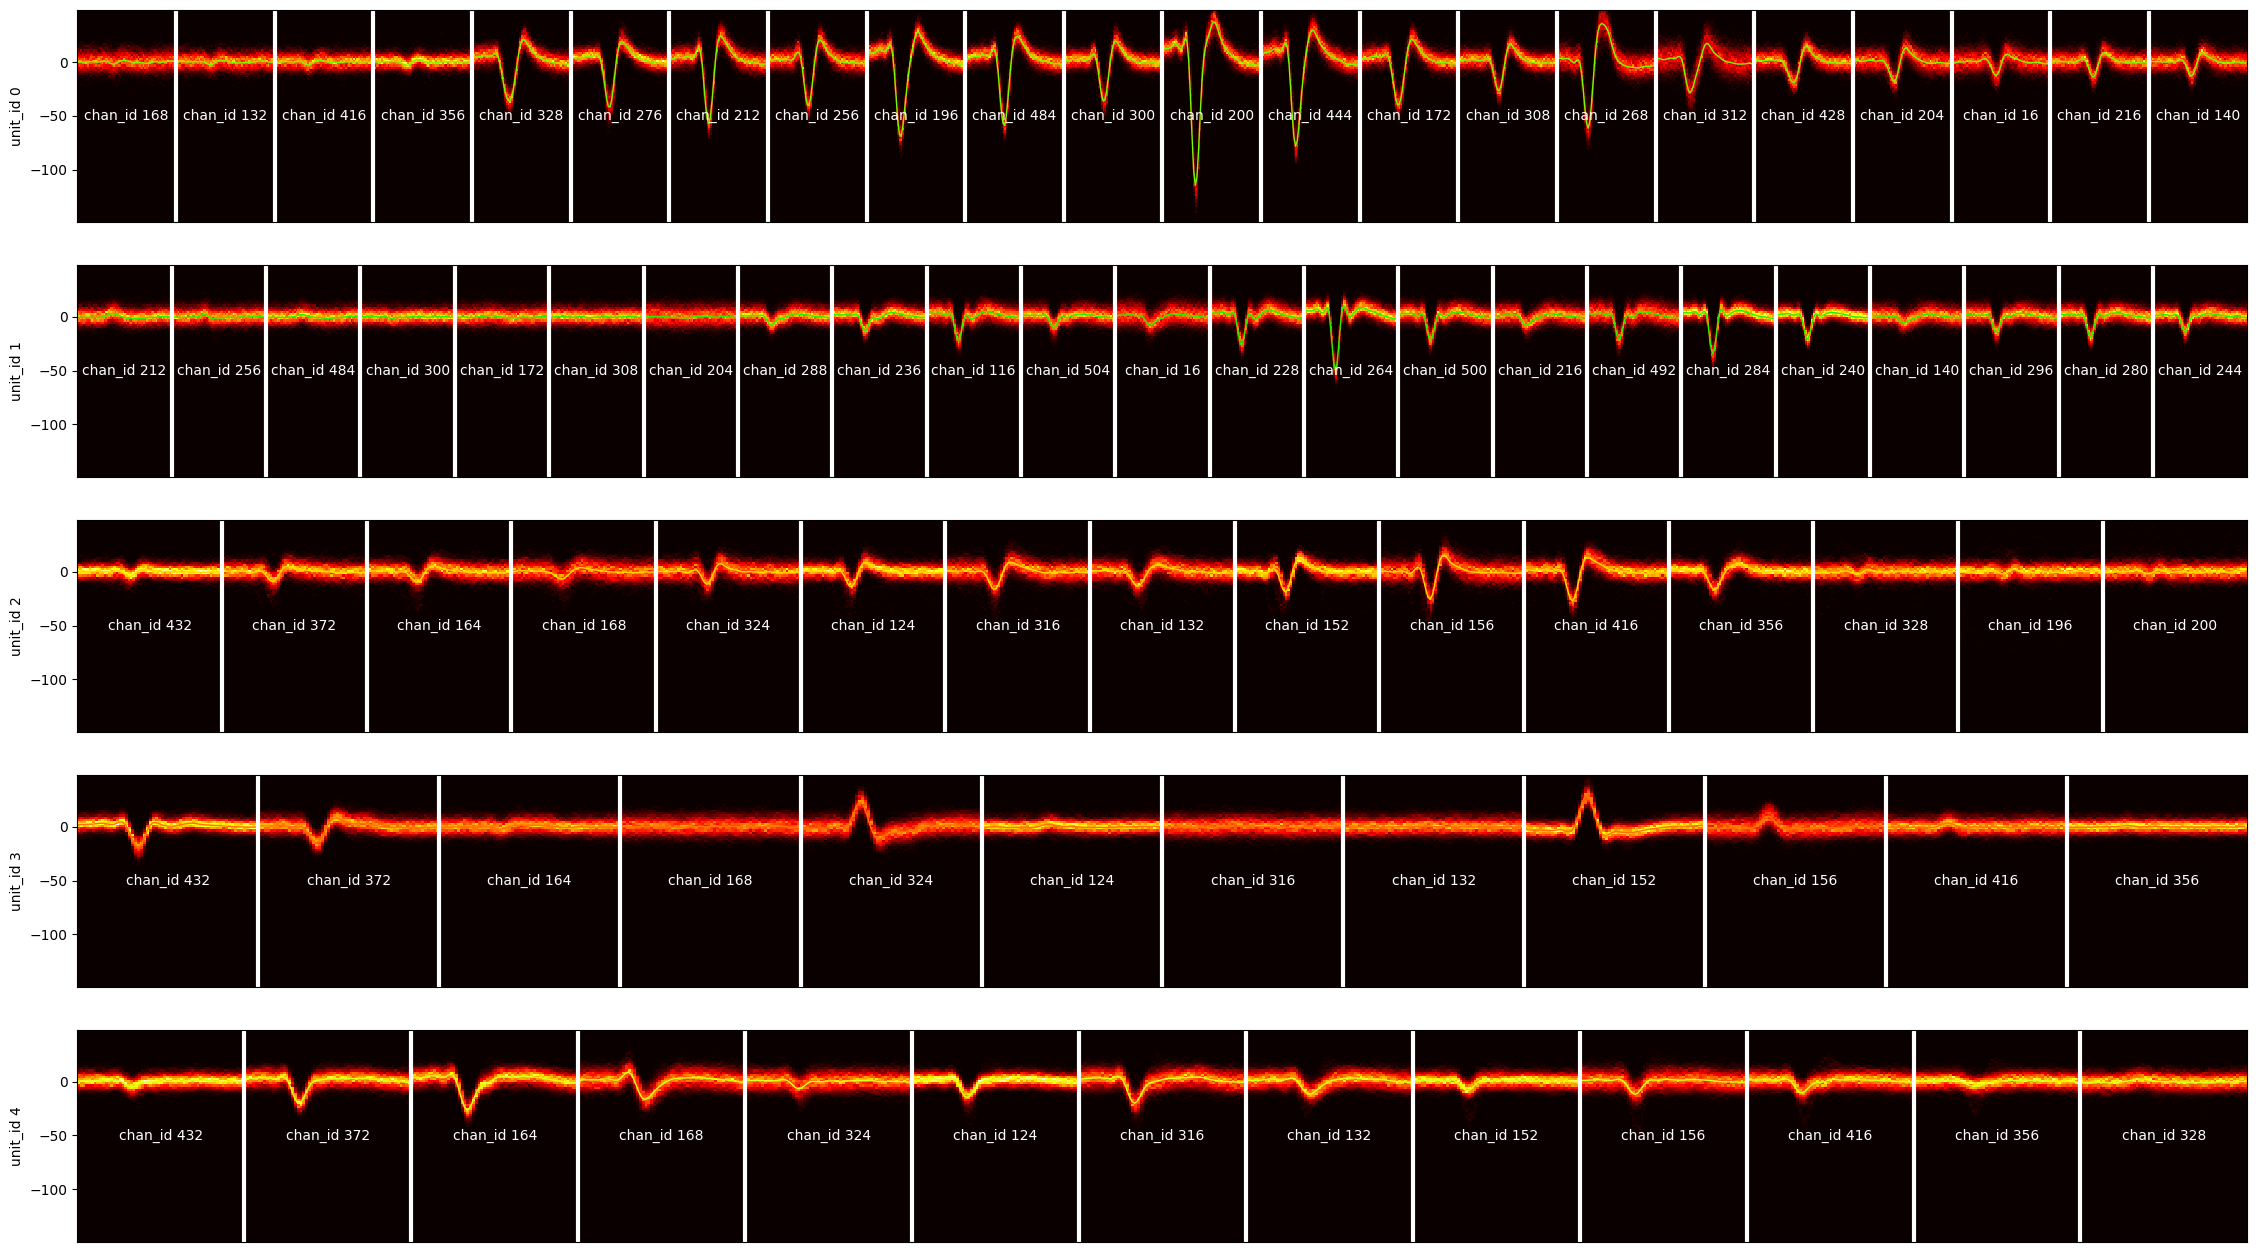

In [20]:
unit_ids = sorting.unit_ids
_ = sw.plot_unit_waveforms_density_map(we, unit_ids=unit_ids, figsize=(28,16))

In [23]:
#launch spikeinterface GUI
import spikeinterface_gui
app = spikeinterface_gui.mkQApp() 
we = si.WaveformExtractor.load_from_folder('waveforms_folder')
win = spikeinterface_gui.MainWindow(we)
win.show()
app.exec_()

Force compute_noise_levels() this is needed


/var/folders/1f/mhkx4xrs0jqcl18cg_v8c6lc0000gq/T/ipykernel_87138/907902109.py:7: DeprecationWarning: 'exec_' will be removed in the future. Use 'exec' instead.
  app.exec_()


0

In [22]:
_ = sexp.export_report(waveform_extractor=we, output_folder='export_SC2')